# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

C:\Users\minhn\AppData\Local\Temp/ipykernel_3564/382026017.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Data

In [2]:
df = pd.read_csv("HCMcity_temperature.csv")
df.head()

YEAR  MO  DY  WS50M  WS50M_RANGE   QV2M  PRECTOTCORR  T2M_RANGE  \
0  1990   1   1   6.53         4.41  13.98         0.00       9.92   
1  1990   1   2   7.48         2.47  14.22         0.00       9.39   
2  1990   1   3   8.38         2.69  14.16         0.04      10.54   
3  1990   1   4   8.09         3.31  14.10         0.18      10.70   
4  1990   1   5   5.66         6.95  13.06         0.00      11.59   

   ALLSKY_SFC_SW_DWN    T2M  ALLSKY_KT  ALLSKY_SFC_LW_DWN  WS2M  \
0               5.35  26.59       0.62              408.8  3.73   
1               5.70  26.22       0.66              397.7  4.29   
2               5.82  26.49       0.68              395.4  4.76   
3               5.41  26.51       0.63              415.9  4.55   
4               5.65  26.86       0.66              410.8  3.07   

   ALLSKY_SFC_PAR_TOT        LOC  
0               110.9  BinhChanh  
1               117.0  BinhChanh  
2               118.7  BinhChanh  
3               112.1  BinhChanh  
4               117.4  BinhChanh

# Data Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216575 entries, 0 to 216574
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                216575 non-null  int64  
 1   MO                  216575 non-null  int64  
 2   DY                  216575 non-null  int64  
 3   WS50M               216575 non-null  float64
 4   WS50M_RANGE         216575 non-null  float64
 5   QV2M                216575 non-null  float64
 6   PRECTOTCORR         216575 non-null  float64
 7   T2M_RANGE           216575 non-null  float64
 8   ALLSKY_SFC_SW_DWN   216575 non-null  float64
 9   T2M                 216575 non-null  float64
 10  ALLSKY_KT           216575 non-null  float64
 11  ALLSKY_SFC_LW_DWN   216575 non-null  float64
 12  WS2M                216575 non-null  float64
 13  ALLSKY_SFC_PAR_TOT  216575 non-null  float64
 14  LOC                 216575 non-null  object 
dtypes: float64(11), int64(3), object(1

In [4]:
df.shape

(216575, 15)

In [5]:
list(df.columns)

['YEAR',
 'MO',
 'DY',
 'WS50M',
 'WS50M_RANGE',
 'QV2M',
 'PRECTOTCORR',
 'T2M_RANGE',
 'ALLSKY_SFC_SW_DWN',
 'T2M',
 'ALLSKY_KT',
 'ALLSKY_SFC_LW_DWN',
 'WS2M',
 'ALLSKY_SFC_PAR_TOT',
 'LOC']

### Ploting Target Class which is 'T2M'

<AxesSubplot:xlabel='T2M', ylabel='count'>

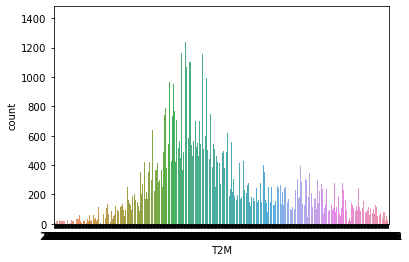

In [6]:
sns.countplot(df['T2M'])

### Ploting WS2M

<AxesSubplot:xlabel='WS2M', ylabel='count'>

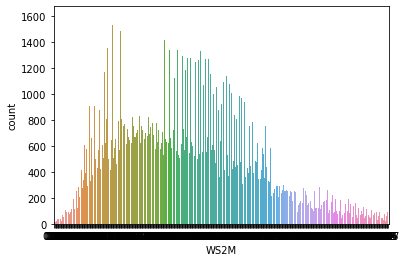

In [7]:
sns.countplot(df['WS2M'])

###  Ploting Heat Map to show the relation between data values

<AxesSubplot:>

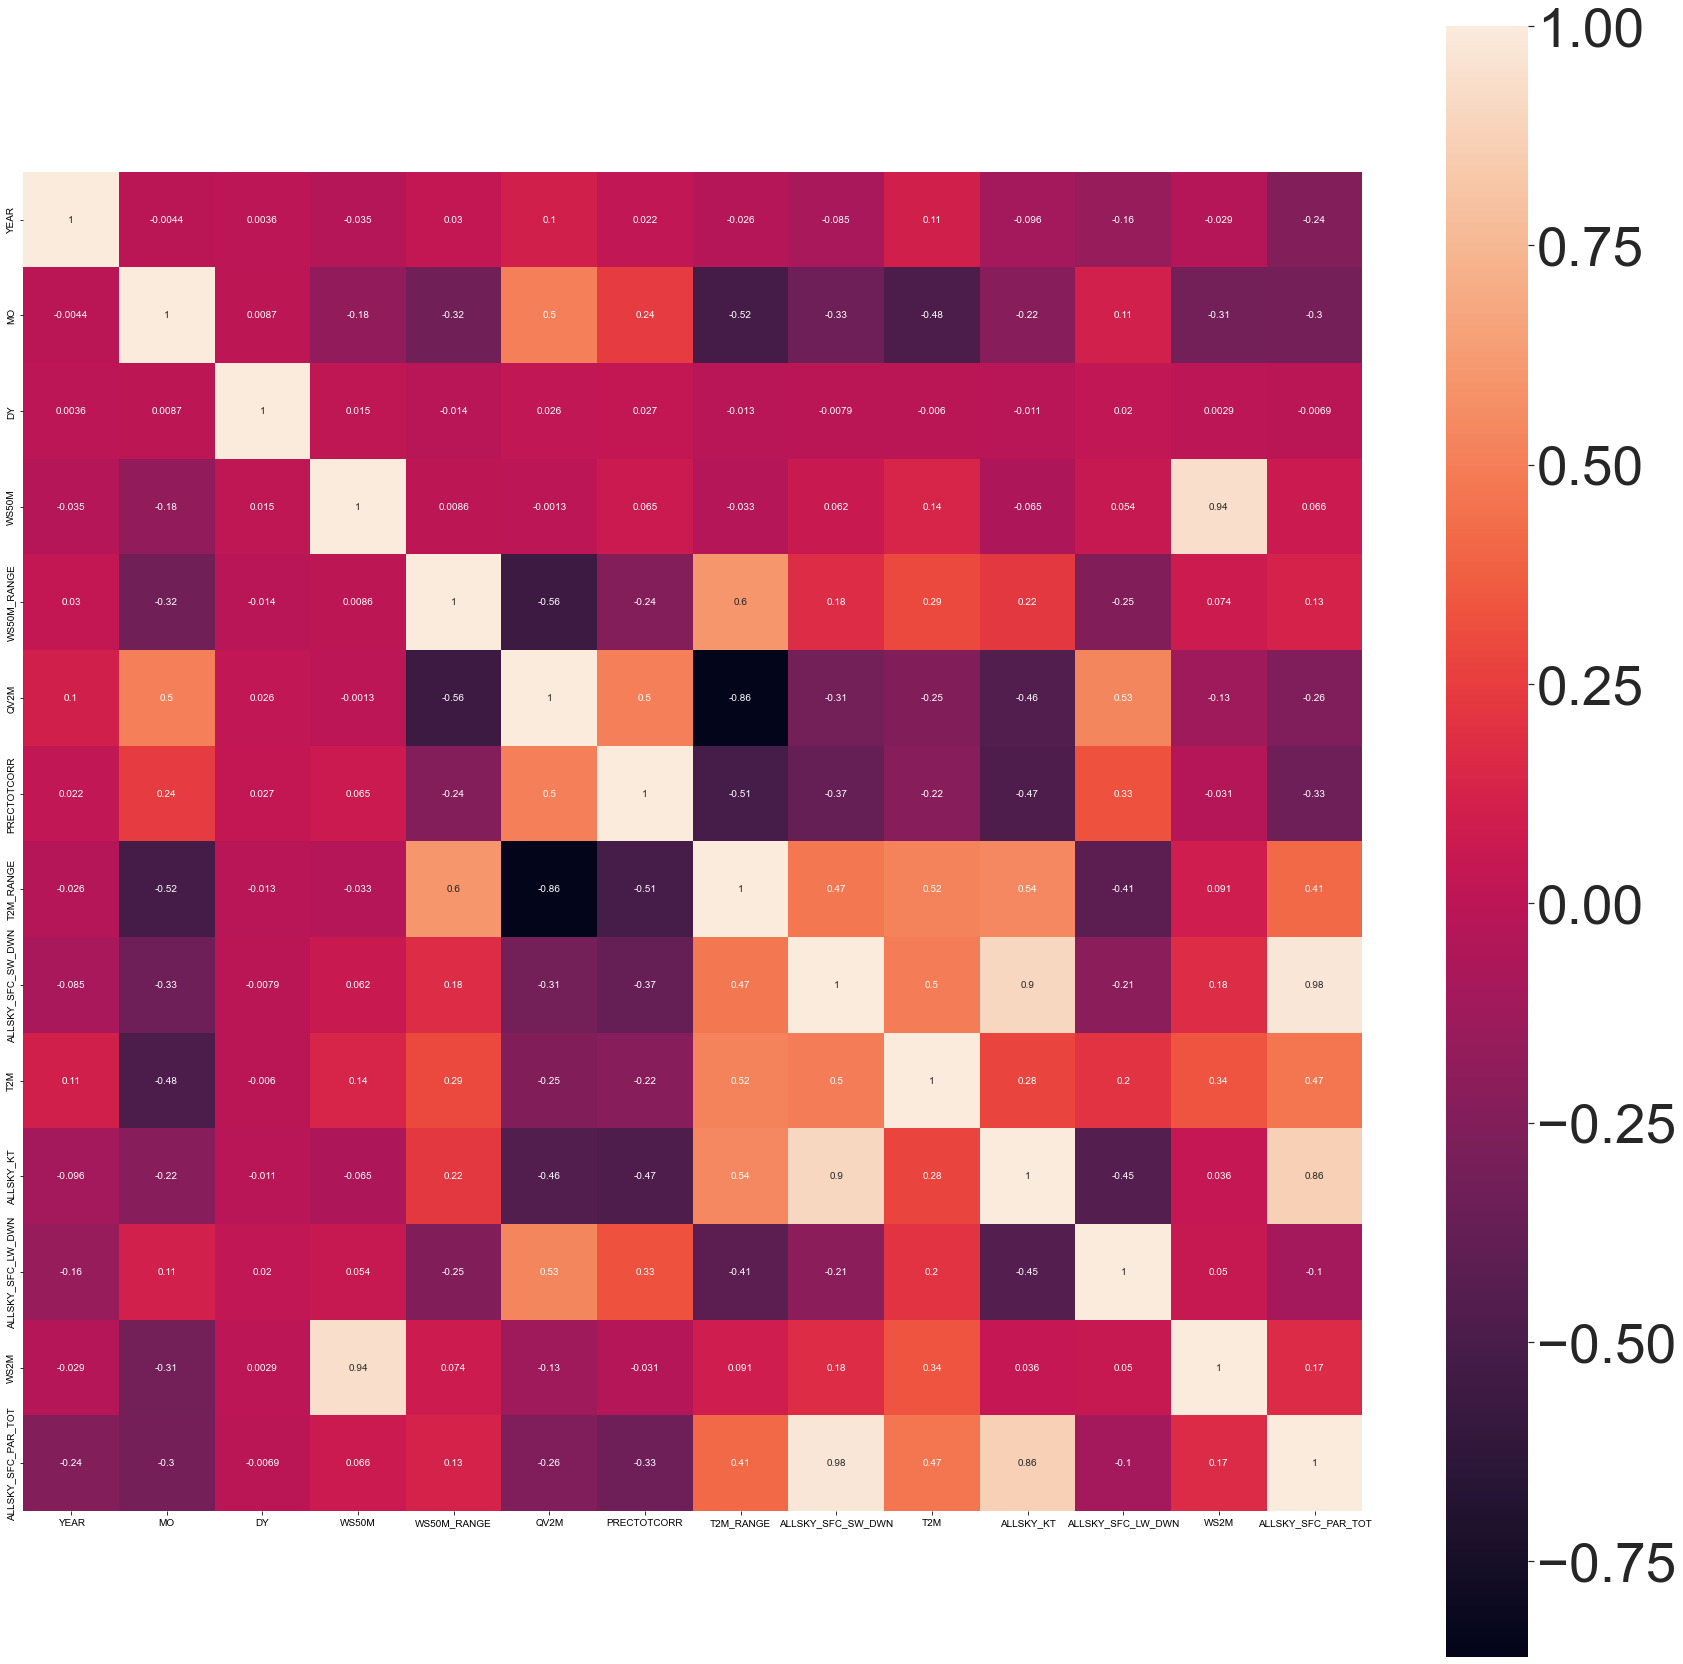

In [8]:
fig = plt.subplots(figsize = (30, 30))
sns.set(font_scale=5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})

### Ploting Pair plot to see both distribution of single variables and relationships between two variables

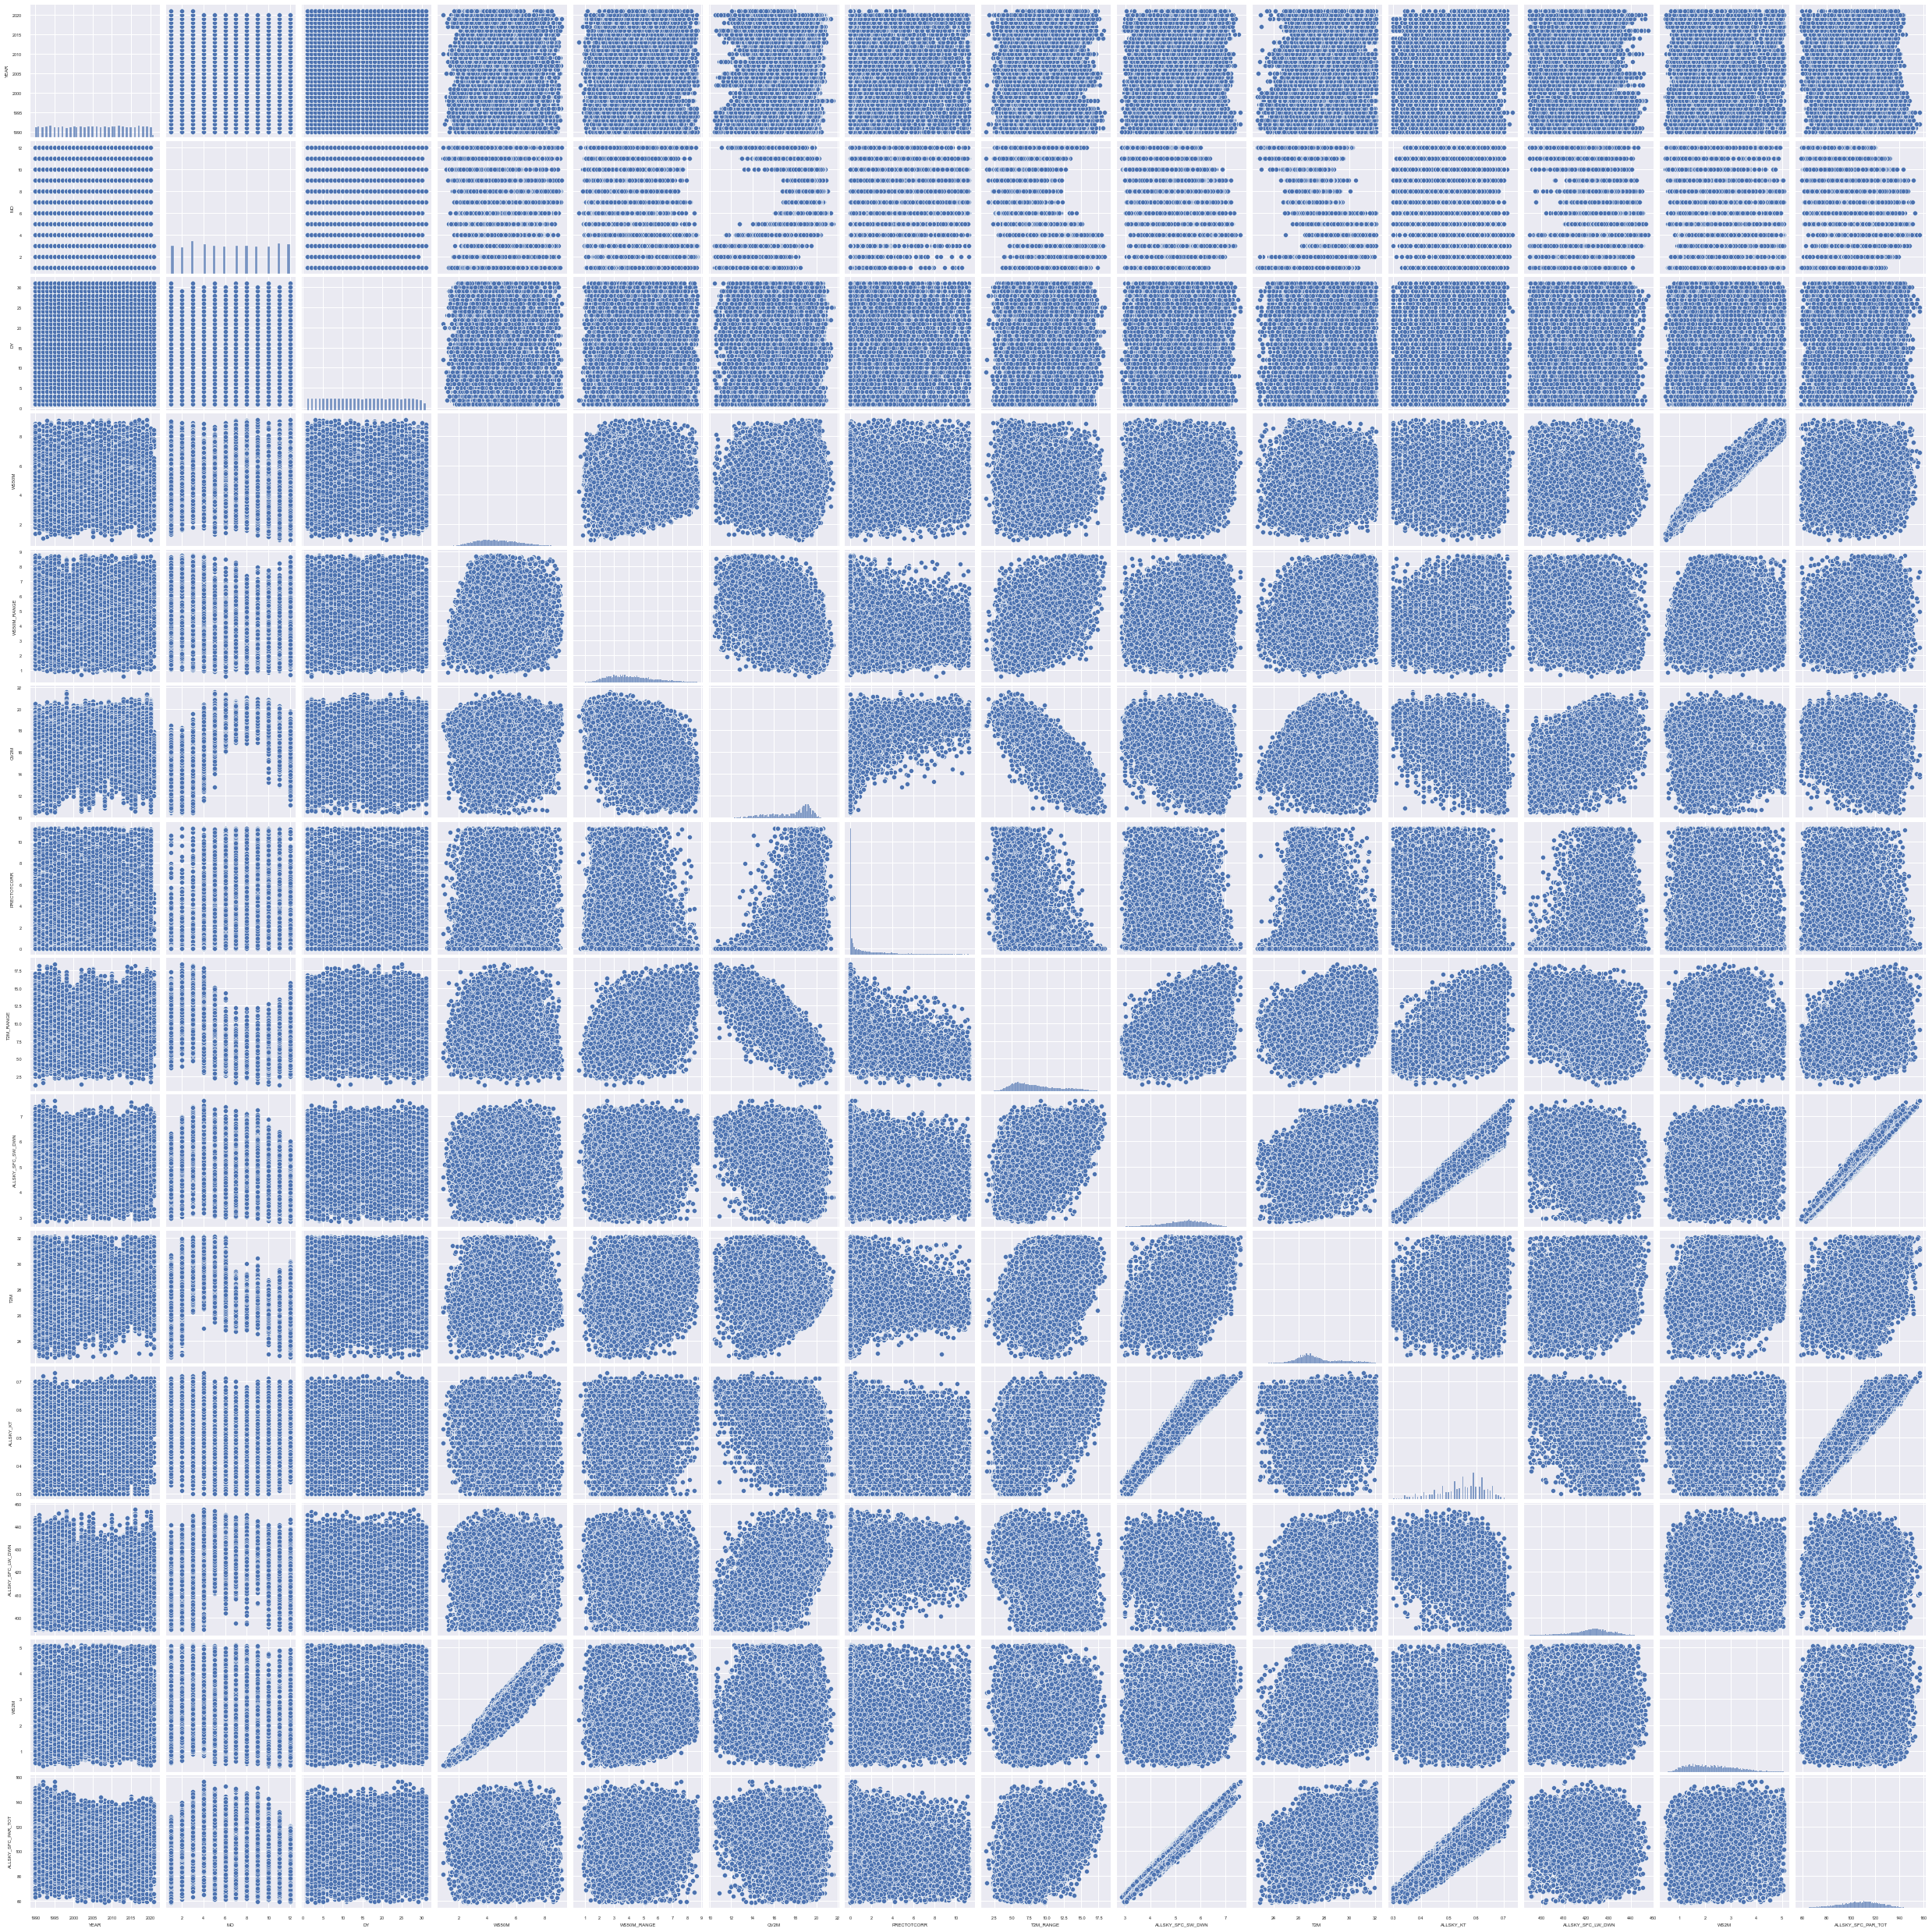

In [11]:
sns.set(font_scale=0.5)
sns.pairplot(df)

# Data Preprocessing

In [9]:
data = df[['WS50M', 'WS50M_RANGE', 'QV2M', 'PRECTOTCORR',
       'T2M_RANGE', 'ALLSKY_SFC_SW_DWN', 'T2M', 'ALLSKY_KT',
       'ALLSKY_SFC_LW_DWN', 'WS2M', 'ALLSKY_SFC_PAR_TOT', 'LOC']]

In [10]:
data_model = data[data['LOC'] == 'ThuDuc']

### Creating X and Y data frame for Training and Testing Purpose

In [11]:
from sklearn.model_selection import train_test_split

X = data_model.drop(['T2M','LOC'], axis = 1)
X.head()

WS50M  WS50M_RANGE   QV2M  PRECTOTCORR  T2M_RANGE  ALLSKY_SFC_SW_DWN  \
207483   4.02         8.31  13.00         0.00      13.52               5.35   
207484   4.64         7.42  12.82         0.00      15.11               5.70   
207485   3.78         6.87  12.51         0.03      15.03               5.82   
207486   3.75         6.32  12.02         0.04      14.61               5.41   
207487   3.55         6.11  11.60         0.00      13.82               5.65   

        ALLSKY_KT  ALLSKY_SFC_LW_DWN  WS2M  ALLSKY_SFC_PAR_TOT  
207483       0.62              408.8  1.95               110.9  
207484       0.66              397.7  2.18               117.0  
207485       0.68              395.4  1.76               118.7  
207486       0.63              415.9  1.70               112.1  
207487       0.66              410.8  1.56               117.4

In [12]:
Y = data_model['T2M']
Y.head()

207483    27.12
207484    26.86
207485    27.34
207486    27.55
207487    27.26
Name: T2M, dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X.iloc[:, :5] = sc.fit_transform(X.iloc[:, :5])

### Splitting dataset for Training and Testing Purpose

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
print(X.shape, Y.shape)

(9092, 10) (9092,)


In [15]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 207483 to 216574
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WS50M               9092 non-null   float64
 1   WS50M_RANGE         9092 non-null   float64
 2   QV2M                9092 non-null   float64
 3   PRECTOTCORR         9092 non-null   float64
 4   T2M_RANGE           9092 non-null   float64
 5   ALLSKY_SFC_SW_DWN   9092 non-null   float64
 6   T2M                 9092 non-null   float64
 7   ALLSKY_KT           9092 non-null   float64
 8   ALLSKY_SFC_LW_DWN   9092 non-null   float64
 9   WS2M                9092 non-null   float64
 10  ALLSKY_SFC_PAR_TOT  9092 non-null   float64
 11  LOC                 9092 non-null   object 
dtypes: float64(11), object(1)
memory usage: 923.4+ KB


# Modeling

## Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [17]:
lpred = lreg.predict(X_test)
lpred

array([26.0074089 , 26.49984013, 26.14366631, ..., 27.47876448,
       27.49015262, 27.10341773])

### Score for Linear Regression Model

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Square Error (MSE) : " +str(mean_squared_error(y_test, lpred)))
print("Mean absolute error(MAE) : " +str(mean_absolute_error(y_test, lpred)))
print("Quadratic mean (RMSE):  " +str(np.sqrt(mean_squared_error(y_test, lpred))))

Mean Square Error (MSE) : 0.5805684741320744
Mean absolute error(MAE) : 0.5793936550988555
Quadratic mean (RMSE):  0.7619504407322528


In [20]:
print("Training accuracy: " +str(lreg.score(X_train, y_train)))
print("Testing accuracy:  " +str(lreg.score(X_test, y_test)))

Training accuracy: 0.838790316442598
Testing accuracy:  0.8225044914531987


In [22]:
from sklearn.metrics import r2_score
lscore = r2_score(y_test, lpred)
print("R2 score: " + str(lscore))

R2 score: 0.8225044914531987


### Prediction graph

<AxesSubplot:xlabel='T2M'>

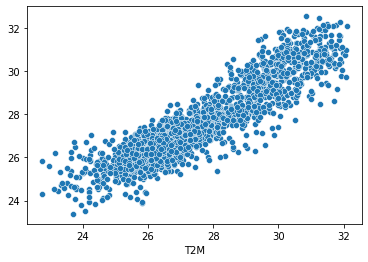

In [24]:
sns.scatterplot(x=y_test, y=lpred)

<AxesSubplot:xlabel='T2M', ylabel='Density'>

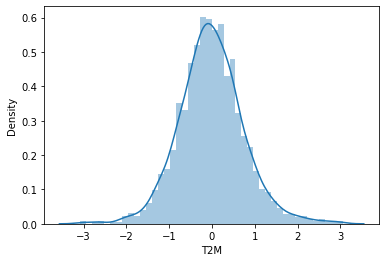

In [25]:
import seaborn as sns
sns.distplot(y_test-lpred)

### Parameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lreg,parameters, cv=10)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print (grid.best_params_)
y_grid = grid.predict(X_test)

r2 / variance :  0.8379823890510627
{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Square Error (MSE) : " +str(mean_squared_error(y_test, y_grid)))
print("Mean absolute error(MAE) : " +str(mean_absolute_error(y_test, y_grid)))
print("Quadratic mean (RMSE):  " +str(np.sqrt(mean_squared_error(y_test, y_grid))))

Mean Square Error (MSE) : 0.5805684741320736
Mean absolute error(MAE) : 0.5793936550988552
Quadratic mean (RMSE):  0.7619504407322524


In [43]:
from sklearn.metrics import r2_score
lscore_grid = r2_score(y_test, y_grid)
print("R2 score: " +str(lscore_grid))

R2 score: 0.822504491453199


## Support Vector Regression

In [28]:
from sklearn.svm import SVR
svm_rbf = SVR() 
svm_rbf.fit(X_train, y_train)

SVR()

In [29]:
svm_pred = svm_rbf.predict(X_test)
svm_pred

array([27.10405076, 27.03507734, 28.00974793, ..., 27.86549655,
       28.55425632, 27.38216486])

### Score for Support Vector Regression

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Square Error (MSE) : " +str(mean_squared_error(y_test, svm_pred)))
print("Mean absolute error(MAE) : " +str(mean_absolute_error(y_test, svm_pred)))
print("Root Mean Squared Error (RMSE):  " +str(np.sqrt(mean_squared_error(y_test, svm_pred))))

Mean Square Error (MSE) : 2.3115709572878993
Mean absolute error(MAE) : 1.1913327758354466
Root Mean Squared Error (RMSE):  1.5203851345260841


In [31]:
from sklearn.metrics import r2_score
lscore = r2_score(y_test, svm_pred)
print("R2 score: " +str(lscore))

R2 score: 0.2932901442517982


### Prediction graph

<AxesSubplot:xlabel='T2M'>

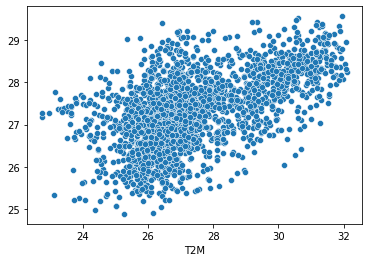

In [32]:
sns.scatterplot(x=y_test, y=svm_pred)

<AxesSubplot:xlabel='T2M', ylabel='Density'>

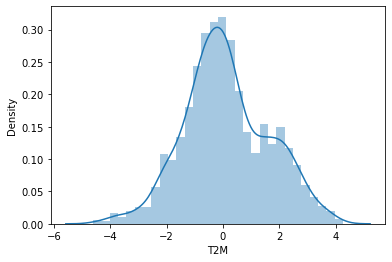

In [33]:
import seaborn as sns
sns.distplot(y_test-svm_pred)

### Parameter tuning

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,1e1,1e2,1e3],
              'gamma': [1,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7],
              'kernel': ['rbf']}

In [35]:
svm_grid = GridSearchCV(estimator=svm_rbf,
                    param_grid=param_grid,
                    scoring ='neg_mean_squared_error',
                    refit = True,
                    n_jobs=-1,
                    cv=5,
                    verbose = 2)

In [36]:
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10.0, 100.0, 1000.0],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
svm_grid.best_params_

{'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}

In [38]:
svm_grid_pred=svm_grid.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Square Error (MSE) : " +str(mean_squared_error(y_test, svm_grid_pred)))
print("Mean absolute error(MAE) : " +str(mean_absolute_error(y_test, svm_grid_pred)))
print("Root Mean Squared Error (RMSE):  " +str(np.sqrt(mean_squared_error(y_test, svm_grid_pred))))

Mean Square Error (MSE) : 0.4633297300645417
Mean absolute error(MAE) : 0.5018858570565824
Root Mean Squared Error (RMSE):  0.6806832817577803


In [40]:
from sklearn.metrics import r2_score
svr_score = r2_score(y_test, svm_grid_pred)
print("R2 score: " +str(svr_score))

R2 score: 0.8583475511900611


<AxesSubplot:xlabel='T2M'>

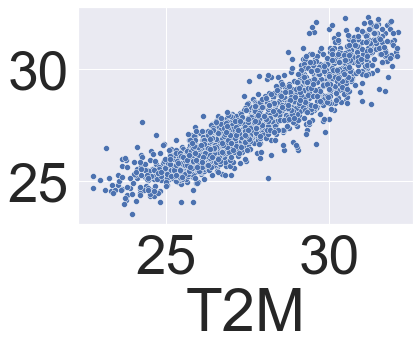

In [48]:
sns.scatterplot(x=y_test, y=svm_grid_pred)

<AxesSubplot:xlabel='T2M', ylabel='Density'>

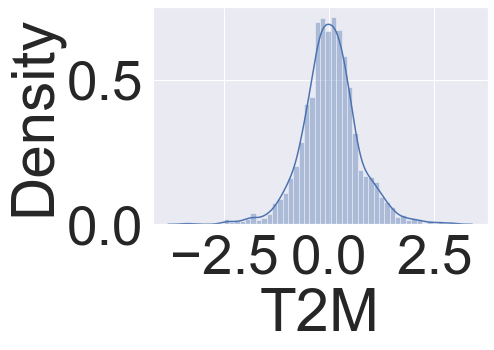

In [49]:
import seaborn as sns
sns.distplot(y_test-svm_grid_pred)

## Random Forest Regression Model

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
rf_pred=rf.predict(X_test)
rf_pred

array([26.3992, 26.4277, 25.895 , ..., 27.6507, 26.5693, 26.7697])

### Score for Support Vector Regression

In [52]:
print('Mean absolute error(MAE) : ' +str(mean_absolute_error(y_test, rf_pred)))
print('Mean Square Error (MSE) :  ' +str(mean_squared_error(y_test, rf_pred)))
print('Quadratic mean (RMSE): ' +str(np.sqrt(mean_squared_error(y_test,rf_pred))))

Mean absolute error(MAE) : 0.5590551253849545
Mean Square Error (MSE) :  0.6248204102111748
Quadratic mean (RMSE): 0.7904558243261762


In [53]:
print("Training accuracy: " +str(rf.score(X_train, y_train)))
print("Testing accuracy:  " +str(rf.score(X_test, y_test)))

Training accuracy: 0.9748314341912003
Testing accuracy:  0.8089754759304688


In [54]:
rfscore = r2_score(y_test, rf_pred)
print("R-2 score is: " +str(rfscore))

R-2 score is: 0.8089754759304688


### Prediction graph

<AxesSubplot:xlabel='T2M'>

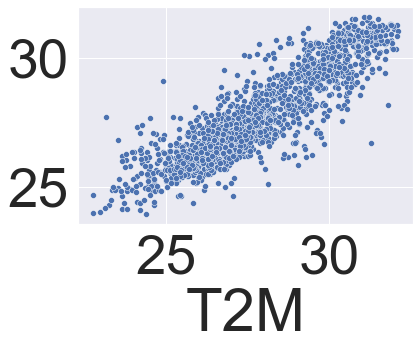

In [55]:
sns.scatterplot(x=y_test, y=rf_pred)

<AxesSubplot:xlabel='T2M', ylabel='Density'>

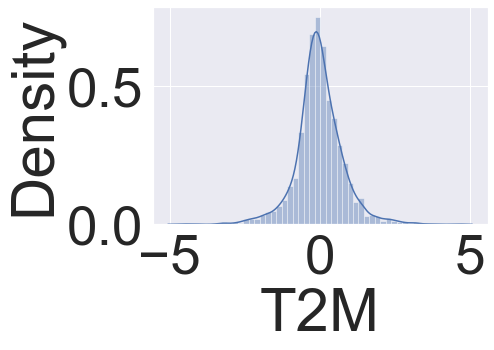

In [56]:
import seaborn as sns
sns.distplot(y_test-rf_pred)

### Parameter tuning

In [57]:
#Số lượng cây
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Số lượng thuộc tính cần xét mỗi lần phân chia
max_features = ['auto', 'sqrt']
# Cấp tối đa của cây
max_depth = [2,15]
# Số lượng mẫu tối thiểu cần thiết để tách một nút
min_samples_split = [1, 10]
# Số lượng mẫu tối thiểu cần thiết tại mỗi nút lá
min_samples_leaf = [1, 5]
# Phương pháp chọn mẫu huấn luyện từng cây
bootstrap = [True, False]

In [58]:
# Tạo lưới tham số
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 15], 'min_samples_split': [1, 10], 'min_samples_leaf': [1, 5], 'bootstrap': [True, False]}


In [59]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [60]:
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [1, 10],
                         'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166,
                                          183, 200]},
             verbose=2)

In [61]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 150}

In [62]:
rf_grid_pred = rf_grid.predict(X_test)

In [63]:
print('MAE : ' +str(mean_absolute_error(y_test, rf_grid_pred)))
print('MSE :  ' +str(mean_squared_error(y_test, rf_grid_pred)))
print('RMSE : ' +str(np.sqrt(mean_squared_error(y_test,rf_grid_pred))))

MAE : 0.5606192058352956
MSE :  0.6051679050095472
RMSE : 0.7779253852456206


In [64]:
print("Training accuracy: " +str(rf_grid.score(X_train, y_train)))
print("Testing accuracy:  " +str(rf_grid.score(X_test, y_test)))

Training accuracy: 0.9722205622634829
Testing accuracy:  0.8149837791029694


In [65]:
rfscore_search = r2_score(y_test, rf_grid_pred)
print("R-2 score is: " +str(rfscore_search))

R-2 score is: 0.8149837791029694


<AxesSubplot:xlabel='T2M'>

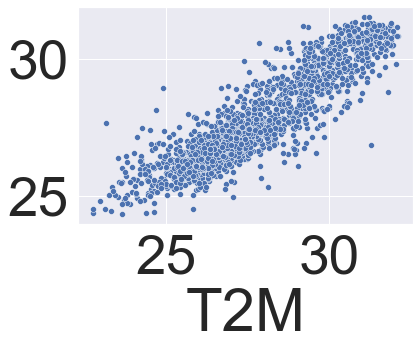

In [66]:
sns.scatterplot(x=y_test, y=rf_grid_pred)

<AxesSubplot:xlabel='T2M', ylabel='Density'>

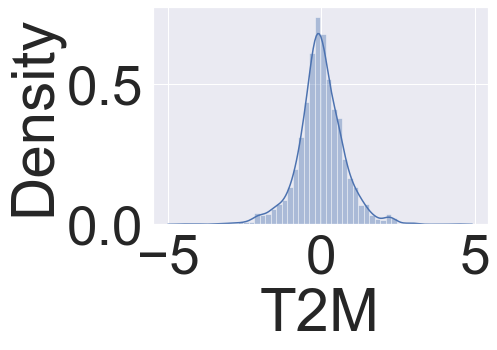

In [67]:
import seaborn as sns
sns.distplot(y_test-rf_grid_pred)